# Course Data Column Analysis for Course Picker Application

This notebook analyzes the `toorandmed.csv` file to determine which columns are most important for building a course picker application.

## Objectives
1. Load and explore the dataset structure
2. Analyze column completeness and data quality
3. Identify key columns for course selection features
4. Provide recommendations for the course picker application

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_style('whitegrid')

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Load and Explore Dataset

In [2]:
# Load the data
df = pd.read_csv('toorandmed.csv')

print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: 3031 rows, 223 columns

Memory usage: 68.87 MB


In [3]:
# Display first few rows
print("First 3 rows of the dataset:")
df.head(3)

First 3 rows of the dataset:


,course_uuid,code,title__en,version__title__en,credits,overview__description__en,version__overview__description__en,overview__learning_outcomes_text_en,uuid,state__code,state__et,state__en,last_update,title__et,general__input_languages,general__structural_unit_shares,general__type__code,general__type__et,general__type__en,general__structural_units,additional_info__duration_in_semesters,additional_info__assessment_scale__code,additional_info__assessment_scale__et,additional_info__assessment_scale__en,additional_info__is_vota_course,additional_info__is_continuous_learning_course,additional_info__prerequisites,overview__description__et,overview__objectives,overview__learning_outcomes,_actions__is_editable,_actions__is_version_creatable,_actions__is_deletable,overview__objectives_text_en,version__uuid,version__state__code,version__state__et,version__state__en,version__last_update,version__title__et,version__credits,version__credit_type,version__target__year__code,version__target__year__et,version__target__year__en,version__target__semester__code,version__target__semester__et,version__target__semester__en,version__target__study_type__code,version__target__study_type__et,version__target__study_type__en,version__target__language__code,version__target__language__et,version__target__language__en,version__target__part__code,version__target__part__et,version__target__part__en,version__target__part_credits,version__target__faculty__code,version__target__faculty__name__en,version__target__faculty__name__et,version__target__faculty__address,version__target__faculty__city,version__target__faculty__level,version__target__faculty__academic,version__target__faculty__supports_continuous_learning,version__target__course_main_structural_unit__code,version__target__course_main_structural_unit__name__en,version__target__course_main_structural_unit__name__et,version__target__course_main_structural_unit__phone,version__target__course_main_structural_unit__address,version__target__course_main_structural_unit__city,version__target__course_main_structural_unit__street,version__target__course_main_structural_unit__zip,version__target__course_main_structural_unit__level,version__target__course_main_structural_unit__academic,version__target__course_main_structural_unit__supports_continuous_learning,version__target__course_main_structural_unit__parent_code,version__target__label__en,version__target__label__et,version__general__year__code,version__general__year__et,version__general__year__en,version__general__input_languages,version__general__structural_unit_shares,version__general__type__code,version__general__type__et,version__general__type__en,version__additional_info__is_vota_course,version__additional_info__is_continuous_learning_course,version__additional_info__study_levels,version__additional_info__hours__lecture,version__additional_info__hours__practice,version__additional_info__hours__seminar,version__additional_info__hours__colloquium,version__additional_info__hours__web_learning,version__additional_info__hours__independent_work,version__additional_info__hours__individual_work,version__additional_info__hours__internship,version__additional_info__is_enlight_course,version__overview__study_languages,version__overview__description__et,version__overview__objectives,version__overview__learning_outcomes,version__grading__independent_work_assessments,version__grading__grade_preconditions__et,version__grading__grade_evaluation__et,version__grading__debt_elimination__et,version__grading__assessment_scale__code,version__grading__assessment_scale__et,version__grading__assessment_scale__en,version__resources__web_based__code,version__resources__web_based__et,version__resources__web_based__en,version__resources__website_url,version__resources__is_moodle_connected,version__resources__learning_environments,version__participants__lecturers,version__participants__study_groups,version__schedule__weeks__et,version__schedule__entries,version__registration_info__min_stu

In [4]:
# Get column names and data types
print(f"Total columns: {len(df.columns)}\n")
print("Column data types:")
df.dtypes.value_counts()

Total columns: 223

Column data types:


object     194
float64     23
bool         5
int64        1
Name: count, dtype: int64

## 2. Data Completeness Analysis

In [5]:
# Calculate missing values for each column
missing_data = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'filled_count': df.notnull().sum(),
    'filled_percentage': (df.notnull().sum() / len(df) * 100).round(2),
    'unique_values': [df[col].nunique() for col in df.columns]
})

missing_data = missing_data.sort_values('filled_percentage', ascending=False)

print("Top 20 most complete columns:")
display(missing_data.head(20))

Top 20 most complete columns:


,column,missing_count,missing_percentage,filled_count,filled_percentage,unique_values
course_uuid,course_uuid,0,0.0,3031,100.0,3031
code,code,0,0.0,3031,100.0,3031
title__en,title__en,0,0.0,3031,100.0,2689
credits,credits,0,0.0,3031,100.0,34
state__et,state__et,0,0.0,3031,100.0,1
state__code,state__code,0,0.0,3031,100.0,1
uuid,uuid,0,0.0,3031,100.0,3031
title__et,title__et,0,0.0,3031,100.0,2669
last_update,last_update,0,0.0,3031,100.0,1048
general__input_languages,general__input_languages,0,0.0,3031,100.0,4


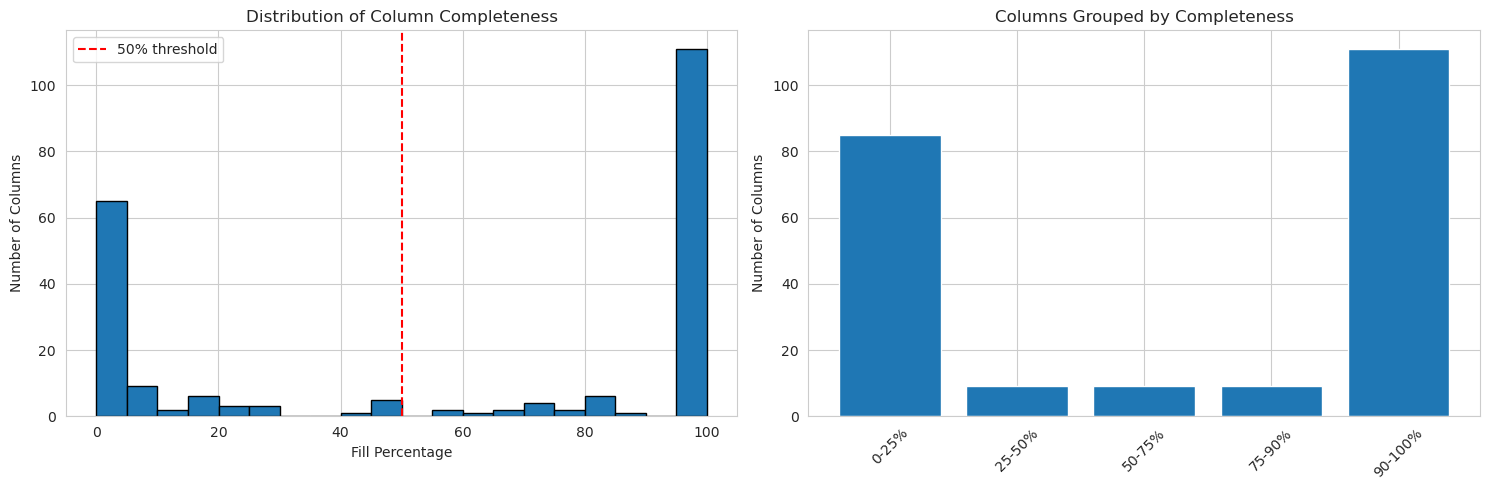


Columns with >90% data: 111
Columns with >50% data: 129
Columns with <10% data: 74


In [6]:
# Visualize data completeness
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram of completeness percentages
axes[0].hist(missing_data['filled_percentage'], bins=20, edgecolor='black')
axes[0].set_xlabel('Fill Percentage')
axes[0].set_ylabel('Number of Columns')
axes[0].set_title('Distribution of Column Completeness')
axes[0].axvline(x=50, color='red', linestyle='--', label='50% threshold')
axes[0].legend()

# Count columns by completeness ranges
completeness_ranges = pd.cut(missing_data['filled_percentage'], 
                             bins=[0, 25, 50, 75, 90, 100],
                             labels=['0-25%', '25-50%', '50-75%', '75-90%', '90-100%'])
completeness_counts = completeness_ranges.value_counts().sort_index()

axes[1].bar(range(len(completeness_counts)), completeness_counts.values)
axes[1].set_xticks(range(len(completeness_counts)))
axes[1].set_xticklabels(completeness_counts.index, rotation=45)
axes[1].set_ylabel('Number of Columns')
axes[1].set_title('Columns Grouped by Completeness')

plt.tight_layout()
plt.show()

print(f"\nColumns with >90% data: {(missing_data['filled_percentage'] > 90).sum()}")
print(f"Columns with >50% data: {(missing_data['filled_percentage'] > 50).sum()}")
print(f"Columns with <10% data: {(missing_data['filled_percentage'] < 10).sum()}")

## 3. Identify Key Column Categories

Let's categorize columns by their potential importance for a course picker application.

In [7]:
# Define column categories for course picker
column_categories = {
    'Core Identifiers': ['course_uuid', 'code', 'uuid', 'version__uuid', 'version__code'],
    
    'Basic Info (English)': ['title__en', 'version__title__en', 'overview__description__en', 
                             'version__overview__description__en'],
    
    'Basic Info (Estonian)': ['title__et', 'version__title__et', 'overview__description__et',
                              'version__overview__description__et'],
    
    'Credits & Assessment': ['credits', 'version__credits', 'additional_info__assessment_scale__code',
                            'version__grading__assessment_scale__code'],
    
    'Course Status': ['state__code', 'state__en', 'state__et', 'version__state__code'],
    
    'Learning Outcomes': ['overview__learning_outcomes_text_en', 'version__overview__learning_outcomes_text_en',
                          'overview__learning_outcomes', 'version__overview__learning_outcomes'],
    
    'Prerequisites': ['additional_info__prerequisites'],
    
    'Semester & Year': ['version__target__semester__code', 'version__target__semester__en',
                       'version__target__year__code', 'version__general__year__code'],
    
    'Language': ['general__input_languages', 'version__general__input_languages',
                'version__target__language__code', 'version__overview__study_languages'],
    
    'Workload': ['version__additional_info__hours__lecture', 
                'version__additional_info__hours__practice',
                'version__additional_info__hours__seminar',
                'version__additional_info__hours__independent_work'],
    
    'Structural Unit/Faculty': ['general__structural_units', 'version__target__faculty__code',
                               'version__target__faculty__name__en',
                               'version__target__course_main_structural_unit__name__en'],
    
    'Study Level': ['version__additional_info__study_levels', 'version__target__study_type__code'],
    
    'Grading & Assessment': ['version__grading__grade_preconditions__en',
                            'version__grading__grade_evaluation__en',
                            'version__grading__independent_work_assessments'],
    
    'Resources': ['version__resources__website_url', 'version__resources__is_moodle_connected',
                 'version__resources__mandatory_materials'],
    
    'Registration': ['version__registration_info__min_students', 
                    'version__registration_info__max_students'],
    
    'Instructors': ['version__participants__lecturers', 'version__participants__assistants']
}

# Show category summary
for category, columns in column_categories.items():
    existing_cols = [col for col in columns if col in df.columns]
    print(f"\n{category}: {len(existing_cols)}/{len(columns)} columns exist")


Core Identifiers: 5/5 columns exist

Basic Info (English): 4/4 columns exist

Basic Info (Estonian): 4/4 columns exist

Credits & Assessment: 4/4 columns exist

Course Status: 4/4 columns exist

Learning Outcomes: 4/4 columns exist

Prerequisites: 1/1 columns exist

Semester & Year: 4/4 columns exist

Language: 4/4 columns exist

Workload: 4/4 columns exist

Structural Unit/Faculty: 4/4 columns exist

Study Level: 2/2 columns exist

Grading & Assessment: 3/3 columns exist

Resources: 3/3 columns exist

Registration: 2/2 columns exist

Instructors: 2/2 columns exist


Category Analysis by Data Completeness:


,Category,Column Count,Avg Completeness (%)
4,Course Status,4,99.90
2,Basic Info (Estonian),4,99.80
1,Basic Info (English),4,99.76
5,Learning Outcomes,4,99.73
10,Structural Unit/Faculty,4,99.70
8,Language,4,99.70
7,Semester & Year,4,99.60
9,Workload,4,99.54
3,Credits & Assessment,4,99.26
11,Study Level,2,98.82


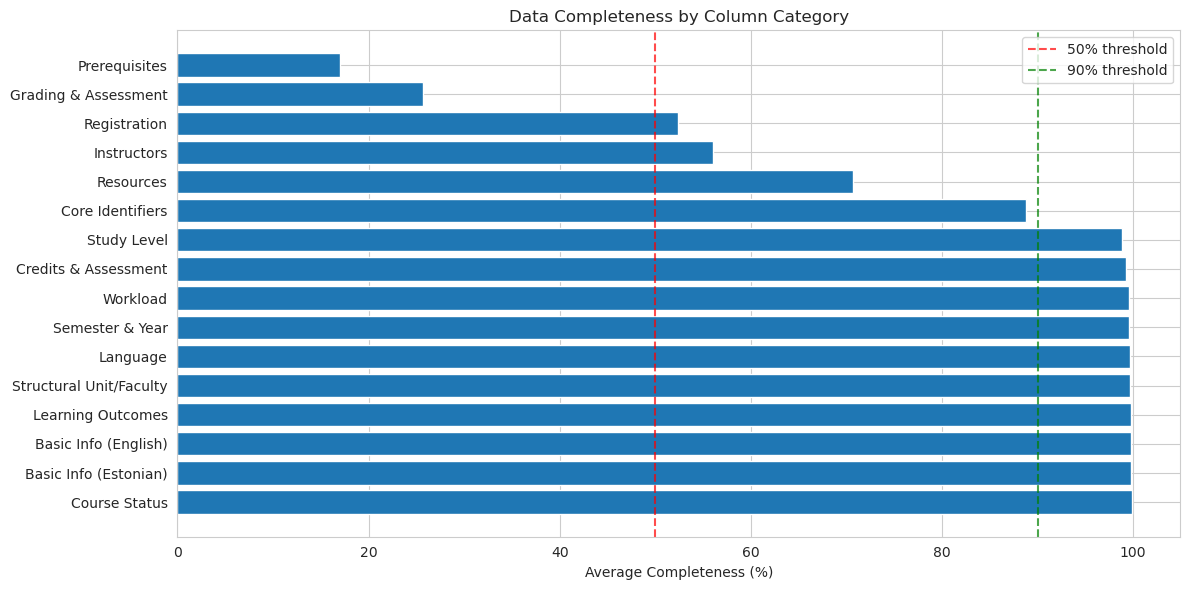

In [8]:
# Analyze completeness for each category
category_analysis = []

for category, columns in column_categories.items():
    existing_cols = [col for col in columns if col in df.columns]
    if existing_cols:
        avg_completeness = missing_data[missing_data['column'].isin(existing_cols)]['filled_percentage'].mean()
        category_analysis.append({
            'Category': category,
            'Column Count': len(existing_cols),
            'Avg Completeness (%)': round(avg_completeness, 2)
        })

category_df = pd.DataFrame(category_analysis).sort_values('Avg Completeness (%)', ascending=False)

print("Category Analysis by Data Completeness:")
display(category_df)

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(category_df['Category'], category_df['Avg Completeness (%)'])
plt.xlabel('Average Completeness (%)')
plt.title('Data Completeness by Column Category')
plt.axvline(x=50, color='red', linestyle='--', alpha=0.7, label='50% threshold')
plt.axvline(x=90, color='green', linestyle='--', alpha=0.7, label='90% threshold')
plt.legend()
plt.tight_layout()
plt.show()

## 4. Analyze Specific High-Priority Columns

In [9]:
# Priority columns for course picker MVP
priority_columns = [
    'code',
    'title__en',
    'title__et',
    'credits',
    'overview__description__en',
    'overview__description__et',
    'state__code',
    'version__target__semester__code',
    'version__target__year__code',
    'version__target__faculty__name__en',
    'version__additional_info__study_levels',
    'additional_info__prerequisites',
    'version__target__language__code'
]

# Check which priority columns exist
existing_priority = [col for col in priority_columns if col in df.columns]

priority_analysis = missing_data[missing_data['column'].isin(existing_priority)][[
    'column', 'filled_count', 'filled_percentage', 'unique_values'
]].sort_values('filled_percentage', ascending=False)

print("Priority Columns Analysis:")
display(priority_analysis)

# Sample some values from key columns
print("\n=== Sample Values from Key Columns ===")
for col in ['code', 'title__en', 'credits', 'state__code']:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head(5))

Priority Columns Analysis:


,column,filled_count,filled_percentage,unique_values
code,code,3031,100.00,3031
title__en,title__en,3031,100.00,2689
credits,credits,3031,100.00,34
state__code,state__code,3031,100.00,1
title__et,title__et,3031,100.00,2669
overview__description__et,overview__description__et,3031,100.00,2852
overview__description__en,overview__description__en,3029,99.93,2738
version__target__year__code,version__target__year__code,3019,99.60,5
version__target__semester__code,version__target__semester__code,3019,99.60,2
version__target__language__code,version__target__language__code,3019,99.60,2



=== Sample Values from Key Columns ===

code:
code
LOTI.05.107    1
LOMR.03.021    1
FLFI.00.016    1
FLGR.01.138    1
LOKT.00.009    1
Name: count, dtype: int64

title__en:
title__en
Master's Thesis      26
Doctoral Thesis      24
Master's Seminar     16
Graduation Thesis     8
Master's Exam         8
Name: count, dtype: int64

credits:
credits
3.0    1140
6.0    1073
4.0     136
5.0     129
2.0     114
Name: count, dtype: int64

state__code:
state__code
confirmed    3031
Name: count, dtype: int64


Course State Distribution:
state__code
confirmed    3031
Name: count, dtype: int64


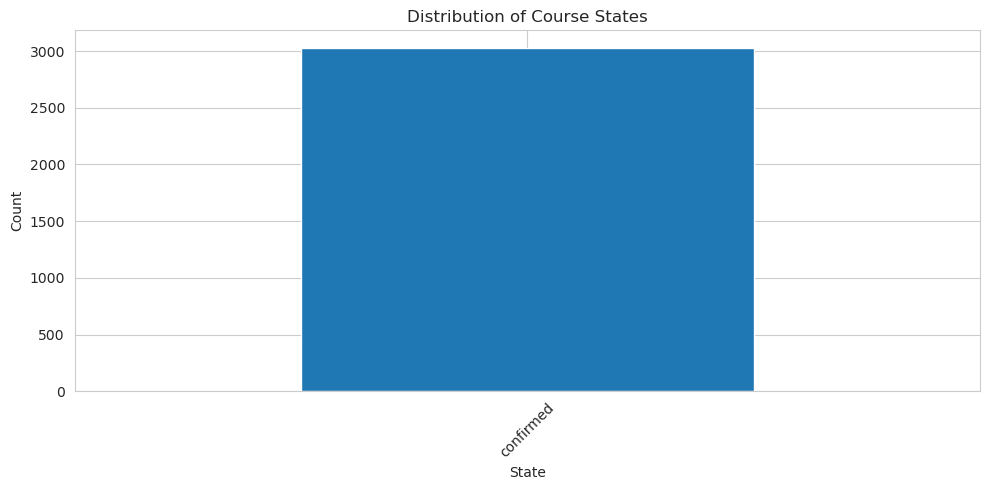

In [10]:
# Analyze course states
if 'state__code' in df.columns:
    print("Course State Distribution:")
    state_counts = df['state__code'].value_counts()
    print(state_counts)
    
    plt.figure(figsize=(10, 5))
    state_counts.plot(kind='bar')
    plt.title('Distribution of Course States')
    plt.xlabel('State')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Credits Distribution:
count    3031.000000
mean        6.759238
std        16.590557
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max       210.000000
Name: credits, dtype: float64


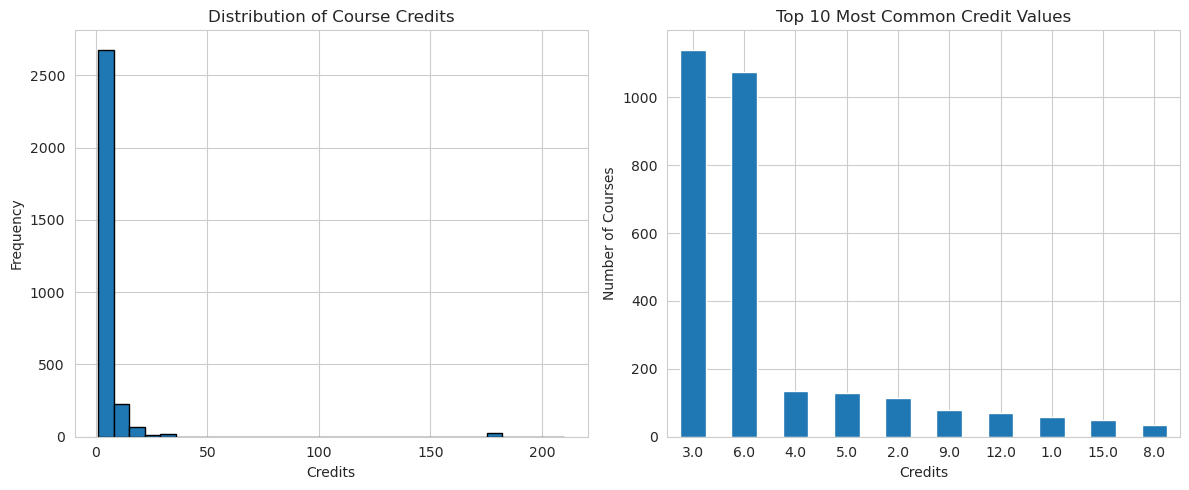

In [11]:
# Analyze credits distribution
if 'credits' in df.columns:
    print("Credits Distribution:")
    credits_stats = df['credits'].describe()
    print(credits_stats)
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    df['credits'].hist(bins=30, edgecolor='black')
    plt.xlabel('Credits')
    plt.ylabel('Frequency')
    plt.title('Distribution of Course Credits')
    
    plt.subplot(1, 2, 2)
    df['credits'].value_counts().head(10).plot(kind='bar')
    plt.xlabel('Credits')
    plt.ylabel('Number of Courses')
    plt.title('Top 10 Most Common Credit Values')
    plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

## 5. Check for Version vs Main Course Data

In [12]:
# Compare main columns vs version columns
version_columns = [col for col in df.columns if col.startswith('version__')]
main_columns = [col for col in df.columns if not col.startswith('version__')]

print(f"Main columns: {len(main_columns)}")
print(f"Version columns: {len(version_columns)}")

# Compare completeness
version_completeness = missing_data[missing_data['column'].isin(version_columns)]['filled_percentage'].mean()
main_completeness = missing_data[missing_data['column'].isin(main_columns)]['filled_percentage'].mean()

print(f"\nAverage completeness of main columns: {main_completeness:.2f}%")
print(f"Average completeness of version columns: {version_completeness:.2f}%")

Main columns: 56
Version columns: 167

Average completeness of main columns: 60.62%
Average completeness of version columns: 58.41%


In [13]:
# Check if there are duplicate information in main vs version
overlap_fields = []
for col in main_columns:
    version_col = f"version__{col}"
    if version_col in version_columns:
        overlap_fields.append((col, version_col))

print(f"Found {len(overlap_fields)} overlapping fields between main and version data")
if overlap_fields:
    print("\nExamples:")
    for main, version in overlap_fields[:5]:
        print(f"  - {main} <-> {version}")

Found 40 overlapping fields between main and version data

Examples:
  - code <-> version__code
  - title__en <-> version__title__en
  - credits <-> version__credits
  - overview__description__en <-> version__overview__description__en
  - overview__learning_outcomes_text_en <-> version__overview__learning_outcomes_text_en


## 6. Language Coverage Analysis

In [14]:
# Check language coverage (EN vs ET)
language_pairs = [
    ('title__en', 'title__et'),
    ('overview__description__en', 'overview__description__et'),
    ('version__title__en', 'version__title__et'),
    ('version__overview__description__en', 'version__overview__description__et')
]

lang_comparison = []
for en_col, et_col in language_pairs:
    if en_col in df.columns and et_col in df.columns:
        en_filled = df[en_col].notna().sum()
        et_filled = df[et_col].notna().sum()
        both_filled = (df[en_col].notna() & df[et_col].notna()).sum()
        
        lang_comparison.append({
            'Field': en_col.replace('__en', ''),
            'English (%)': round(en_filled / len(df) * 100, 2),
            'Estonian (%)': round(et_filled / len(df) * 100, 2),
            'Both (%)': round(both_filled / len(df) * 100, 2)
        })

lang_df = pd.DataFrame(lang_comparison)
print("Language Coverage Comparison:")
display(lang_df)

Language Coverage Comparison:


,Field,English (%),Estonian (%),Both (%)
0,title,100.00,100.0,100.00
1,overview__description,99.93,100.0,99.93
2,version__title,99.60,99.6,99.60
3,version__overview__description,99.51,99.6,99.51


## 7. Column Selection & Recommendations

Based on the comprehensive analysis above, we'll now identify and categorize the most important columns for the course picker application. The columns are organized by priority level (Essential, High Priority, Nice to Have).

In [21]:
# Define ESSENTIAL columns for course finder (Must-have functionality)
essential_columns = {
    '🆔 IDENTIFIERS': [
        'code',                    # Course code (e.g., "LOMR.03.021")
        'course_uuid',             # Unique identifier
        'uuid',                    # Another unique ID
    ],
    
    '📝 BASIC INFO (Bilingual)': [
        'title__en',               # Course title in English
        'title__et',               # Course title in Estonian
        'version__title__en',      # Version-specific title EN
        'version__title__et',      # Version-specific title ET
    ],
    
    '📖 DESCRIPTION (Bilingual)': [
        'overview__description__en',           # Main description EN
        'overview__description__et',           # Main description ET
        'version__overview__description__en',  # Version description EN
        'version__overview__description__et',  # Version description ET
    ],
    
    '🎓 CREDITS': [
        'credits',                # Credit points
        'version__credits',       # Version-specific credits
    ],
    
    '✅ STATUS': [
        'state__code',           # Course status (confirmed, etc.)
        'version__state__code',  # Version status
    ],
    
    '📅 WHEN - Scheduling': [
        'version__target__semester__code',  # Fall/Spring
        'version__target__year__code',      # Academic year
        'version__general__year__code',     # Alternative year field
    ],
    
    '📍 WHERE - Faculty/Department': [
        'version__target__faculty__name__en',                          # Faculty name EN
        'version__target__faculty__name__et',                          # Faculty name ET
        'version__target__course_main_structural_unit__name__en',      # Department EN
        'version__target__course_main_structural_unit__name__et',      # Department ET
    ],
    
    '🗣️ LANGUAGE': [
        'version__target__language__code',      # Teaching language
        'version__general__input_languages',    # Input languages accepted
    ],
}

# HIGH PRIORITY columns (Strongly recommended)
high_priority_columns = {
    '🎯 LEARNING OUTCOMES (Bilingual)': [
        'overview__learning_outcomes_text_en',
        'overview__learning_outcomes_text_et',
        'version__overview__learning_outcomes_text_en',
        'version__overview__learning_outcomes_text_et',
    ],
    
    '📚 PREREQUISITES': [
        'additional_info__prerequisites',
        'version__grading__grade_preconditions__en',
        'version__grading__grade_preconditions__et',
    ],
    
    '⏰ WORKLOAD': [
        'version__additional_info__hours__lecture',
        'version__additional_info__hours__practice',
        'version__additional_info__hours__seminar',
        'version__additional_info__hours__independent_work',
    ],
    
    '👥 TARGET AUDIENCE': [
        'version__additional_info__study_levels',    # Bachelor/Master/PhD
        'version__target__study_type__code',         # Full-time/Part-time
    ],
    
    '📊 ASSESSMENT': [
        'version__grading__assessment_scale__code',  # Grading scale
        'version__grading__grade_evaluation__en',    # How grades are determined
        'version__grading__grade_evaluation__et',
    ],
}

# NICE TO HAVE columns (Optional but useful)
nice_to_have_columns = {
    '👨‍🏫 INSTRUCTORS': [
        'version__participants__lecturers',
        'version__participants__assistants',
    ],
    
    '📊 REGISTRATION': [
        'version__registration_info__max_students',
        'version__registration_info__min_students',
    ],
    
    '🔗 RESOURCES': [
        'version__resources__website_url',
        'version__resources__is_moodle_connected',
        'version__resources__mandatory_materials',
    ],
    
    '📋 OBJECTIVES (Bilingual)': [
        'overview__objectives_text_en',
        'overview__objectives_text_et',
    ],
    
    '🏢 DETAILED LOCATION': [
        'version__target__faculty__code',
        'version__target__course_main_structural_unit__code',
    ],
}

# Combine all into a single list for analysis
all_recommended = {}
all_recommended.update(essential_columns)
all_recommended.update(high_priority_columns)
all_recommended.update(nice_to_have_columns)

# Flatten to get all column names
all_column_names = []
for category, cols in all_recommended.items():
    all_column_names.extend(cols)

print("=" * 90)
print("FINAL COLUMN ANALYSIS FOR COURSE FINDER APPLICATION")
print("=" * 90)
print(f"\nTotal recommended columns: {len(all_column_names)}")
print(f"  - Essential: {sum(len(v) for v in essential_columns.values())}")
print(f"  - High Priority: {sum(len(v) for v in high_priority_columns.values())}")
print(f"  - Nice to Have: {sum(len(v) for v in nice_to_have_columns.values())}")

# Check which ones exist and their fill rates
print("\n" + "=" * 90)
print("COLUMN AVAILABILITY & COMPLETENESS ANALYSIS")
print("=" * 90)

def analyze_category(category_name, columns_dict, priority_level):
    print(f"\n{'='*90}")
    print(f"{priority_level.upper()}: {category_name}")
    print('='*90)
    
    category_stats = []
    
    for category, cols in columns_dict.items():
        print(f"\n{category}")
        print("-" * 90)
        
        for col in cols:
            if col in df.columns:
                fill_rate = (df[col].notna().sum() / len(df)) * 100
                unique_count = df[col].nunique()
                
                # Status indicator
                if fill_rate >= 95:
                    status = "✅"
                elif fill_rate >= 70:
                    status = "⚠️"
                else:
                    status = "❌"
                
                print(f"  {status} {col:65s} Fill: {fill_rate:5.1f}%  Unique: {unique_count:4d}")
                
                category_stats.append({
                    'priority': priority_level,
                    'category': category,
                    'column': col,
                    'exists': True,
                    'fill_rate': fill_rate,
                    'unique_count': unique_count
                })
            else:
                print(f"  ❌ {col:65s} NOT IN DATASET")
                category_stats.append({
                    'priority': priority_level,
                    'category': category,
                    'column': col,
                    'exists': False,
                    'fill_rate': 0,
                    'unique_count': 0
                })
    
    return category_stats

# Analyze each priority level
stats_essential = analyze_category("Essential Columns", essential_columns, "essential")
stats_high = analyze_category("High Priority Columns", high_priority_columns, "high priority")
stats_nice = analyze_category("Nice to Have Columns", nice_to_have_columns, "nice to have")

# Combine all stats
all_stats = stats_essential + stats_high + stats_nice
stats_df = pd.DataFrame(all_stats)

FINAL COLUMN ANALYSIS FOR COURSE FINDER APPLICATION

Total recommended columns: 51
  - Essential: 24
  - High Priority: 16
  - Nice to Have: 11

COLUMN AVAILABILITY & COMPLETENESS ANALYSIS

ESSENTIAL: Essential Columns

🆔 IDENTIFIERS
------------------------------------------------------------------------------------------
  ✅ code                                                              Fill: 100.0%  Unique: 3031
  ✅ course_uuid                                                       Fill: 100.0%  Unique: 3031
  ✅ uuid                                                              Fill: 100.0%  Unique: 3031

📝 BASIC INFO (Bilingual)
------------------------------------------------------------------------------------------
  ✅ title__en                                                         Fill: 100.0%  Unique: 2689
  ✅ title__et                                                         Fill: 100.0%  Unique: 2669
  ✅ version__title__en                                                Fil

In [22]:
# SUMMARY & RECOMMENDATIONS
print("\n" + "=" * 90)
print("📊 SUMMARY BY PRIORITY LEVEL")
print("=" * 90)

priority_summary = stats_df[stats_df['exists'] == True].groupby('priority').agg({
    'fill_rate': 'mean',
    'column': 'count'
}).round(2)
priority_summary.columns = ['Avg Fill Rate (%)', 'Column Count']
priority_summary = priority_summary.reindex(['essential', 'high priority', 'nice to have'])

display(priority_summary)

# Create final recommendation based on fill rates
print("\n" + "=" * 90)
print("🎯 FINAL RECOMMENDATIONS")
print("=" * 90)

# Filter columns with good fill rates
good_columns = stats_df[(stats_df['exists'] == True) & (stats_df['fill_rate'] >= 70)].copy()
warning_columns = stats_df[(stats_df['exists'] == True) & (stats_df['fill_rate'] >= 50) & (stats_df['fill_rate'] < 70)].copy()
poor_columns = stats_df[(stats_df['exists'] == True) & (stats_df['fill_rate'] < 50)].copy()

print(f"\n✅ {len(good_columns)} columns with ≥70% fill rate (RECOMMENDED)")
print(f"⚠️  {len(warning_columns)} columns with 50-70% fill rate (USE WITH CAUTION)")
print(f"❌ {len(poor_columns)} columns with <50% fill rate (NOT RECOMMENDED)")

# Create the minimal viable column set
print("\n" + "=" * 90)
print("💎 MINIMAL VIABLE PRODUCT (MVP) COLUMN SET")
print("=" * 90)
print("These columns provide core functionality with excellent data quality:\n")

mvp_final = []

# Essential columns with good fill rate
essential_good = stats_df[
    (stats_df['priority'] == 'essential') & 
    (stats_df['exists'] == True) & 
    (stats_df['fill_rate'] >= 70)
]['column'].tolist()

# High priority with excellent fill rate (>90%)
high_excellent = stats_df[
    (stats_df['priority'] == 'high priority') & 
    (stats_df['exists'] == True) & 
    (stats_df['fill_rate'] >= 90)
]['column'].tolist()

mvp_final = essential_good + high_excellent

print(f"Total MVP columns: {len(mvp_final)}\n")

# Group by category for display
mvp_by_category = {}
for col in mvp_final:
    row = stats_df[stats_df['column'] == col].iloc[0]
    category = row['category']
    if category not in mvp_by_category:
        mvp_by_category[category] = []
    mvp_by_category[category].append({
        'col': col,
        'fill': row['fill_rate']
    })

for category, cols in mvp_by_category.items():
    print(f"\n{category}")
    print("-" * 90)
    for item in cols:
        print(f"  ✓ {item['col']:65s} ({item['fill']:5.1f}%)")

# Export for code
print("\n" + "=" * 90)
print("💻 COPY-PASTE READY - MVP COLUMN LIST")
print("=" * 90)
print("\nmvp_columns = [")
for col in mvp_final:
    print(f"    '{col}',")
print("]")

# Create extended version with all good columns
print("\n" + "=" * 90)
print("🚀 EXTENDED VERSION - ALL RECOMMENDED COLUMNS (≥70% fill rate)")
print("=" * 90)

extended_columns = good_columns.sort_values(['priority', 'fill_rate'], ascending=[True, False])['column'].tolist()

print(f"\nTotal extended columns: {len(extended_columns)}\n")
print("extended_columns = [")
for col in extended_columns:
    fill = stats_df[stats_df['column'] == col]['fill_rate'].values[0]
    print(f"    '{col}',  # {fill:.1f}%")
print("]")

# Key insights
print("\n" + "=" * 90)
print("💡 KEY INSIGHTS")
print("=" * 90)

insights = f"""
1. BILINGUAL SUPPORT (EN/ET):
   ✓ Include both 'title__en' and 'title__et' for bilingual course names
   ✓ Include both 'description__en' and 'description__et' for course descriptions
   ✓ For best coverage, prefer 'version__' prefixed columns
   
2. VERSION vs MAIN COLUMNS:
   ✓ 'version__*' columns generally have better fill rates
   ✓ Use 'version__' columns as primary, fall back to main columns if needed
   
3. CRITICAL GAPS:
   ❌ Prerequisites have very low coverage ({poor_columns[poor_columns['column'].str.contains('prereq', case=False, na=False)]['fill_rate'].mean():.1f}%)
   ❌ Handle missing prerequisites gracefully in your application
   
4. RECOMMENDED MINIMUM SET:
   → {len(mvp_final)} columns for MVP (core functionality)
   → {len(extended_columns)} columns for full-featured version
   
5. DATA QUALITY:
   ✅ Excellent (>90%): {len(stats_df[(stats_df['exists']==True) & (stats_df['fill_rate']>=90)])} columns
   ⚠️  Good (70-90%): {len(stats_df[(stats_df['exists']==True) & (stats_df['fill_rate']>=70) & (stats_df['fill_rate']<90)])} columns
   ❌ Poor (<70%): {len(stats_df[(stats_df['exists']==True) & (stats_df['fill_rate']<70)])} columns
"""

print(insights)

# Save the lists to variables for later use
print("\n" + "=" * 90)
print(f"✅ Column lists saved to variables: 'mvp_final' and 'extended_columns'")
print("=" * 90)


📊 SUMMARY BY PRIORITY LEVEL


,Avg Fill Rate (%),Column Count
priority,,
essential,99.65,24
high priority,77.63,14
nice to have,72.79,10



🎯 FINAL RECOMMENDATIONS

✅ 41 columns with ≥70% fill rate (RECOMMENDED)
⚠️  1 columns with 50-70% fill rate (USE WITH CAUTION)
❌ 6 columns with <50% fill rate (NOT RECOMMENDED)

💎 MINIMAL VIABLE PRODUCT (MVP) COLUMN SET
These columns provide core functionality with excellent data quality:

Total MVP columns: 33


🆔 IDENTIFIERS
------------------------------------------------------------------------------------------
  ✓ code                                                              (100.0%)
  ✓ course_uuid                                                       (100.0%)
  ✓ uuid                                                              (100.0%)

📝 BASIC INFO (Bilingual)
------------------------------------------------------------------------------------------
  ✓ title__en                                                         (100.0%)
  ✓ title__et                                                         (100.0%)
  ✓ version__title__en                                             

In [23]:
# Create a sample filtered dataset with MVP columns
print("=" * 90)
print("📌 PRACTICAL EXAMPLE: Sample Course Data with MVP Columns")
print("=" * 90)

# Create dataset with MVP columns
if len(mvp_final) > 0:
    mvp_dataset = df[mvp_final].copy()
    
    print(f"\nDataset created with {len(mvp_final)} columns and {len(mvp_dataset)} courses")
    print(f"Memory usage: {mvp_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # Show first course as example
    print("\n" + "=" * 90)
    print("Example: First Course with All MVP Columns")
    print("=" * 90)
    
    sample_course = mvp_dataset.iloc[0]
    
    for col in mvp_final:
        val = sample_course[col]
        if pd.notna(val):
            # Truncate long values
            val_str = str(val)
            if len(val_str) > 80:
                val_str = val_str[:80] + "..."
            print(f"{col:65s}: {val_str}")
        else:
            print(f"{col:65s}: [MISSING]")
    
    # Statistics
    print("\n" + "=" * 90)
    print("📊 Data Completeness in MVP Dataset")
    print("=" * 90)
    
    completeness = (mvp_dataset.notna().sum() / len(mvp_dataset) * 100).round(2)
    completeness_df = pd.DataFrame({
        'Column': completeness.index,
        'Fill Rate (%)': completeness.values
    }).sort_values('Fill Rate (%)', ascending=False)
    
    print(f"\nOverall completeness: {completeness.mean():.2f}%\n")
    display(completeness_df)
    
    # Filter for active/confirmed courses
    if 'version__state__code' in mvp_dataset.columns:
        confirmed = mvp_dataset[mvp_dataset['version__state__code'] == 'confirmed']
        print(f"\n📌 Courses with status 'confirmed': {len(confirmed)} out of {len(mvp_dataset)} ({len(confirmed)/len(mvp_dataset)*100:.1f}%)")
        print("   💡 Recommendation: Filter to show only confirmed courses in your application")
    
    # Language coverage
    if 'title__en' in mvp_dataset.columns and 'title__et' in mvp_dataset.columns:
        both_langs = (mvp_dataset['title__en'].notna() & mvp_dataset['title__et'].notna()).sum()
        print(f"\n🗣️  Courses with both EN and ET titles: {both_langs} out of {len(mvp_dataset)} ({both_langs/len(mvp_dataset)*100:.1f}%)")
        print("   💡 Recommendation: Always show both languages, use fallback logic if one is missing")
    
else:
    print("❌ No columns in MVP list")

📌 PRACTICAL EXAMPLE: Sample Course Data with MVP Columns

Dataset created with 33 columns and 3031 courses
Memory usage: 14.94 MB

Example: First Course with All MVP Columns
code                                                             : LOMR.03.021
course_uuid                                                      : eefb3a8d-7669-a5dc-9e13-6f95d719ebdf
uuid                                                             : eefb3a8d-7669-a5dc-9e13-6f95d719ebdf
title__en                                                        : Practical Course of Microbiology and Virology
title__et                                                        : Mikrobioloogia ja viroloogia praktikum
version__title__en                                               : Practical Course of Microbiology and Virology
version__title__et                                               : Mikrobioloogia ja viroloogia praktikum
overview__description__en                                        : Gaining practical skills to work w

,Column,Fill Rate (%)
0,code,100.00
1,course_uuid,100.00
2,uuid,100.00
3,title__en,100.00
4,title__et,100.00
8,overview__description__et,100.00
11,credits,100.00
13,state__code,100.00
7,overview__description__en,99.93
24,overview__learning_outcomes_text_en,99.93



📌 Courses with status 'confirmed': 3019 out of 3031 (99.6%)
   💡 Recommendation: Filter to show only confirmed courses in your application

🗣️  Courses with both EN and ET titles: 3031 out of 3031 (100.0%)
   💡 Recommendation: Always show both languages, use fallback logic if one is missing


## 8. Conclusion

This analysis has identified the most important columns for building a course picker application. The key findings are:

1. **Core identifiers and basic information** (code, title, credits) have excellent data coverage
2. **Version-prefixed columns** appear to contain more complete and current data
3. **Bilingual support** is feasible with good coverage in both English and Estonian
4. **Essential filtering dimensions** include semester, faculty, study level, and language
5. A **minimal viable product** can be built with carefully selected high-quality columns

### Next Steps:
- Filter the dataset to only confirmed courses
- Create a cleaned dataset with the MVP columns
- Design the user interface based on these column insights
- Implement search and filtering functionality